# Breast Cancer Prediction Project

Welcome to the Breast Cancer Prediction project! 🎯



## 🔍 Objective

Our goal is to build a machine learning model that can accurately predict whether a tumor is **malignant (M)** or **benign (B)** based on a set of measurements.

We'll use the dataset `Cancer_Data.csv` for this purpose.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##  Step 1: Load the Dataset

In [ ]:
cancer_data = pd.read_csv('Cancer_Data.csv')
cancer_data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


##  Step 2: Explore the Dataset

Here we dive into what the dataset entails as in, its range how many columns and rows, what type of data types are there and how many of them.

In [ ]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
cancer_data.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [ ]:
cancer_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


##  Step 3: Clean the Data

We'll remove any unnecessary columns and handle missing values as well as duplicates.

In [ ]:
print("Original Shape: ", cancer_data.shape)
cancer_data = cancer_data.drop(['id'], axis = 1)
if 'Unnamed: 32' in cancer_data.columns:
  cancer_data = cancer_data.drop(['Unnamed: 32'], axis = 1)
cancer_data = cancer_data.drop_duplicates()

print("Cleaned shape: ", cancer_data.shape)
print("\nData types and all null values: ")
print(cancer_data.info())


Original Shape:  (569, 33)
Cleaned shape:  (569, 31)

Data types and all null values: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float6

##  Step 4: Visualize the Data

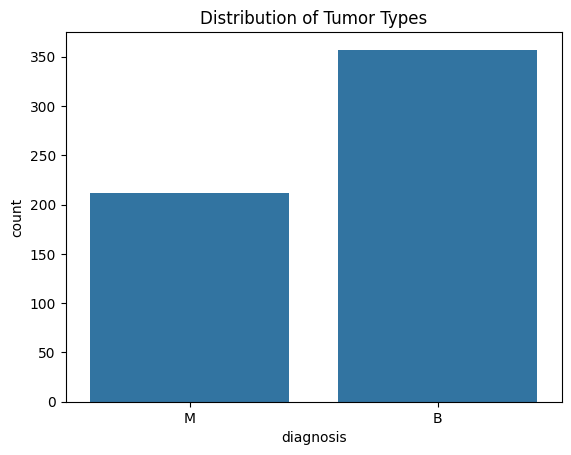

In [ ]:
sns.countplot(x='diagnosis', data=cancer_data)
plt.title('Distribution of Tumor Types')
plt.show()

##  Step 5: Preprocess the Data

In [ ]:
cancer_data['diagnosis'] = cancer_data['diagnosis'].map({'M': 1, 'B': 0})

x = cancer_data.drop('diagnosis', axis = 1)
y = cancer_data['diagnosis']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x,y,
    test_size= 0.2,
    random_state = 42
)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)



##  Step 6: Train a Machine Learning Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression(random_state = 42)
model.fit(x_train, y_train) # Takes in all your x_train values (tumor features) and y_train labels (0 or 1).

y_pred = model.predict(x_test)

print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix: ")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report: ")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)



Accuracy Score:  0.9736842105263158

Confusion Matrix: 
[[70  1]
 [ 2 41]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



##  Step 7: Evaluate the Model

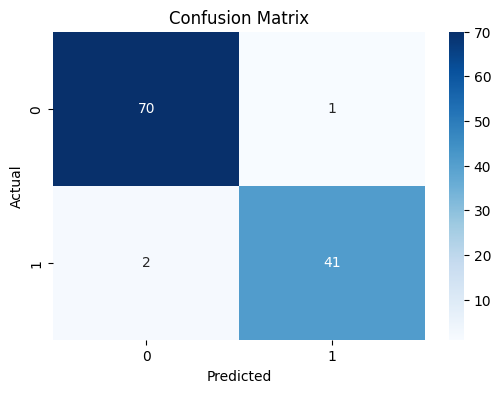

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot = True, fmt = 'd' , cmap = 'Blues'),
xticklabels=['Benign', 'Malignant'],
yticklabels=['Benign', 'Malignant'],

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()





## Step 8:   Random Forest (adding another ML model)

Random Forest Accuracy:  0.9649122807017544
/nClassification Report:  [[70  1]
 [ 3 40]]


<function matplotlib.pyplot.show(close=None, block=None)>

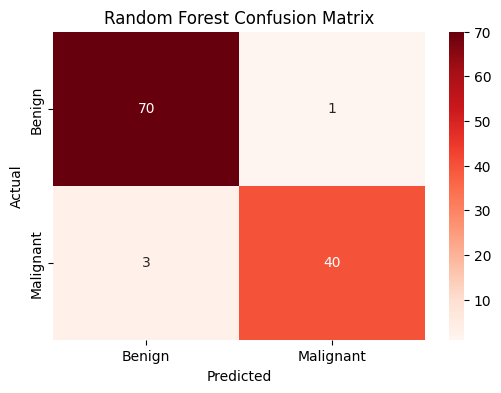

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Random Forest Accuracy: ", accuracy_score(y_test, rf_pred))
print("/nClassification Report: ", confusion_matrix(y_test, rf_pred))

import seaborn as sns
import matplotlib.pyplot as plt

cm_rf = confusion_matrix(y_test, rf_pred)

plt.figure(figsize = (6,4))
sns.heatmap(cm_rf, annot = True, fmt = 'd', cmap = 'Reds',
            xticklabels = ['Benign', 'Malignant'],
            yticklabels = ['Benign', 'Malignant'],)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show

## Step 9: Summary & Model Comparison

We trained two different models — Logistic Regression and Random Forest — to predict whether a tumor is malignant or benign.
Now, we compare their performance based on accuracy and classification metrics.

In [ ]:
logistic_accuracy = accuracy_score(y_test, y_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

print("LOGISTIC REGRESSION ACCURACY: ", logistic_accuracy)
print("RANDOM FOREST ACCURACY: ", rf_accuracy)



LOGISTIC REGRESSION ACCURACY:  0.9736842105263158
RANDOM FOREST ACCURACY:  0.9649122807017544


Random Forest showed slightly higher accuracy compared to Logistic Regression. While Logistic Regression is faster and simpler, Random Forest can capture complex patterns and is often more robust in real-world use.